In [16]:
#Titanic Project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
%matplotlib inline

In [339]:
#Step1 - Reading the data set provided for analysis
titanic_df = pd.read_csv('train.csv')

In [340]:
#Visual Inspection
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_df.shape

(891, 12)

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


this shows. - we have large number of null values for the column Cabin and 
also there are ppl with null value for column Age

In [261]:
# Lets set Passenger id as index for ease of analysis for selecting/slicing
#Not opting right now to change dataset using inplace = True
titanic_df1 = titanic_df.set_index('PassengerId')

In [15]:
titanic_df1.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Q1 - Who were the passengers on the Titanic? - Requires Name, Sex, Age

In [262]:

passenger_info_df = titanic_df1[['Name', 'Sex', 'Age']]
passenger_info_df

,Name,Sex,Age
PassengerId,,,
1,"Braund, Mr. Owen Harris",male,22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
3,"Heikkinen, Miss. Laina",female,26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
5,"Allen, Mr. William Henry",male,35.0
...,...,...,...
887,"Montvila, Rev. Juozas",male,27.0
888,"Graham, Miss. Margaret Edith",female,19.0
889,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN


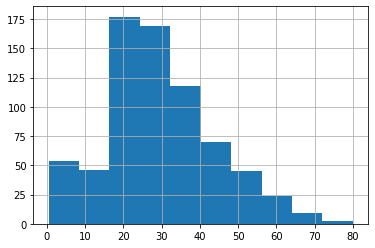

In [51]:
passenger_info_df['Age'].hist(bins=10)

This gives a general idea of age with count of ppl travelling-
age 0-10 -> 50 approx, 10-18 ->48 approx, 18-25 -> 176 approx,26-32->160 and so on

In [263]:
#If we want to know strength of children and adults on ship
def id(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [346]:
titanic_df['PersonID'] = titanic_df[['Age', 'Sex']].apply(id, axis =1)

In [347]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonID
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [348]:
#Check the count of male,female,chiil
titanic_df['PersonID'].value_counts()

male      537
female    271
child      83
Name: PersonID, dtype: int64

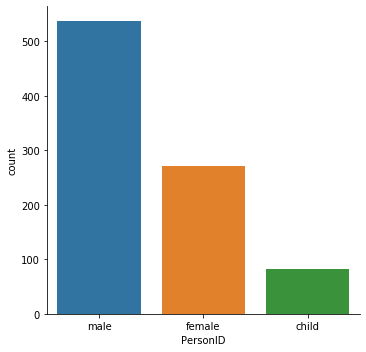

In [349]:
#the above info can be visualized as 
sns.catplot( 'PersonID', data= titanic_df, kind='count')

As we can see male > female > child , almost less each to each by 50%

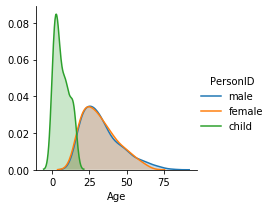

In [350]:
# We can visualize the same on KDE plot aswell
fig = sns.FacetGrid(titanic_df,hue = 'PersonID')
fig.map(sns.kdeplot, 'Age', shade = True)
fig.add_legend()


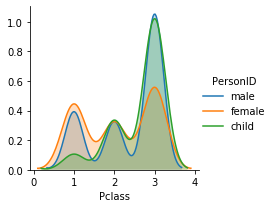

In [351]:
fig = sns.FacetGrid(titanic_df,hue = 'PersonID')
fig.map(sns.kdeplot, 'Pclass', shade = True)
fig.add_legend()



In [352]:
titanic_df['Age'].max()

80.0

In [353]:
titanic_df['Age'].min()

0.42

In [354]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

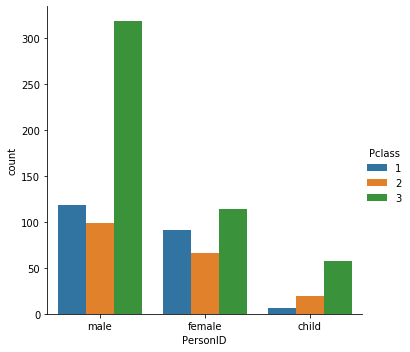

In [355]:
sns.catplot('PersonID', hue = 'Pclass', data = titanic_df, kind = 'count')

Ans - So ppl travelling were aged 4 months - 80 years old and mostly were the male travellers.
Most ppl travelled in Pclass - 3 and most of them embarked from S -> SouthHampton
Also observed children were very less in Class 1 compared to that of Class 2 and Class 3
Oseravtion from 1st histogram - > age 0-10 -> 50 approx, 10-18 ->48 approx, 18-25 -> 176 approx,26-32->160 and so on

# 2.What deck were the passengers on and how does that relate to their class?

In [356]:
#identify deck-> Cabin and class -> Pclass column in data set and 
#then analyse the data to find relationship between two
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonID
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [357]:
#Visualizing the data based
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
PersonID       891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


As we can see Cabin have most of null values as their non null value is 204 compared to 891 ppl

In [410]:
#Lets drop the null values of column Cabin
deck = titanic_df['Cabin'].dropna()

In [411]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [360]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonID
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


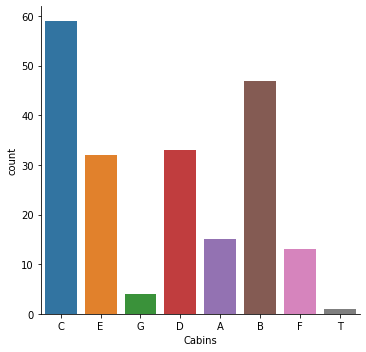

In [253]:
#TO find count of cabins
levels = []
for i in deck:
    levels.append(i[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabins']
sns.catplot('Cabins', data = cabin_df, kind = 'count')


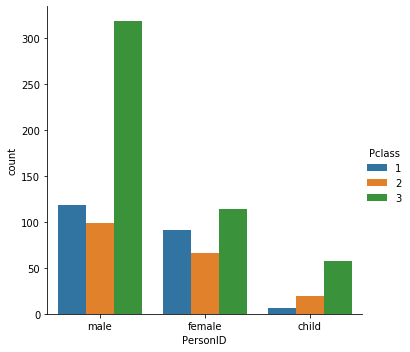

In [361]:
sns.catplot('PersonID', hue = 'Pclass', data = titanic_df, kind = 'count')

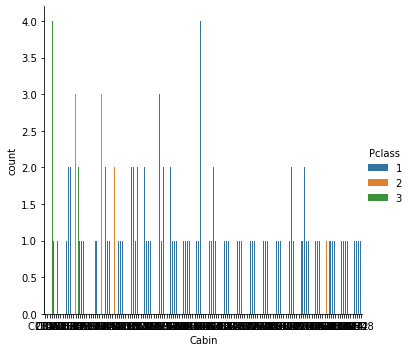

In [362]:
sns.catplot('Cabin', hue = 'Pclass' , data = titanic_df , kind = 'count')

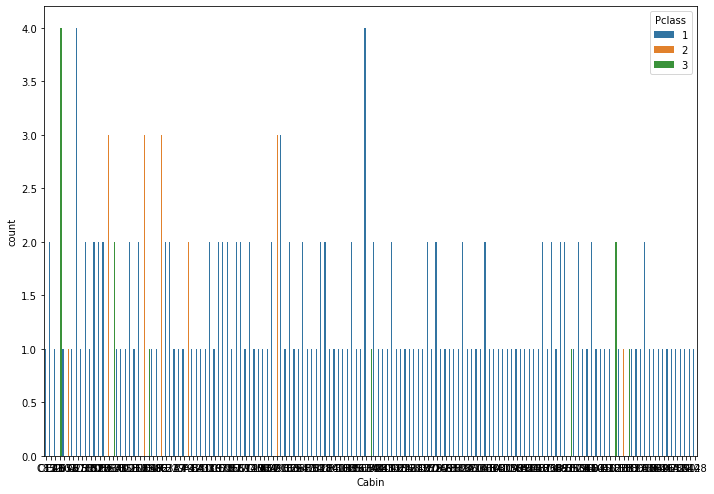

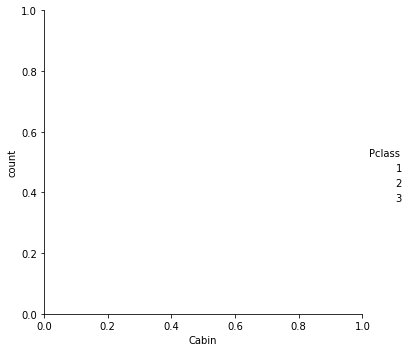

In [363]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.catplot('Cabin', hue = 'Pclass' ,ax=ax, data=titanic_df, kind = 'count')

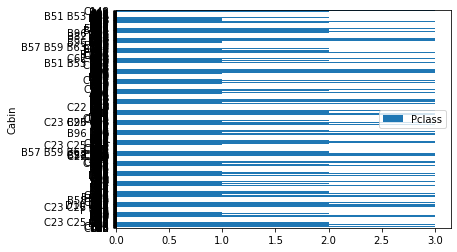

In [364]:
titanic_df.plot('Cabin', 'Pclass', kind = 'barh')

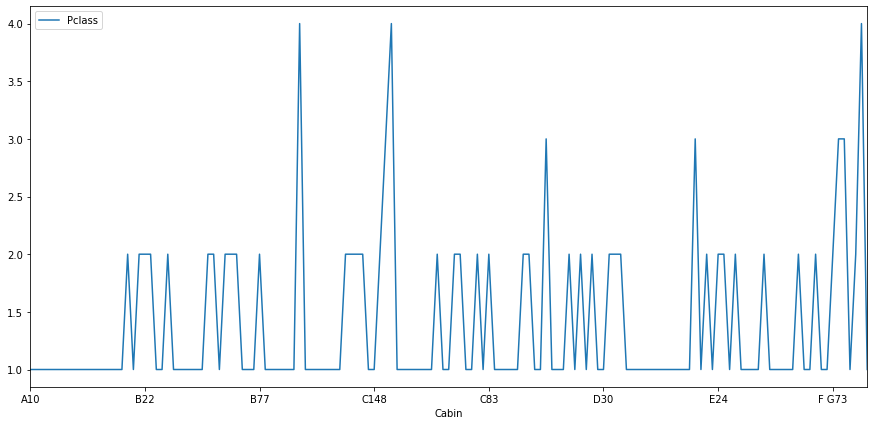

In [365]:
fig, ax = plt.subplots(figsize=(15,7))

titanic_df.groupby(['Cabin']).count().plot(ax=ax , y = 'Pclass')

In [366]:
titanic_df['Pclass'].max()

3

Ans - We could see relationship between Pclass and Cabin -> here most of the people are of Pclass2 in all of the decks

# 3.) Where did the passengers come from?

In [367]:
#Embarked is port of embarkation -C = Cherbourg, Q = Queenstown, S = Southampton
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonID
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [368]:
#finding port of embarkation
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

This shows the count of ppl embarked from different ports

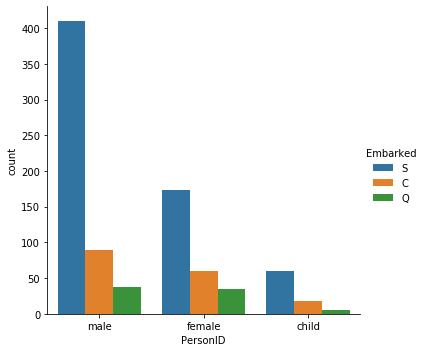

In [369]:
#Lets plot the graph of ppl against port of embarkation
sns.catplot('PersonID', hue = 'Embarked', data = titanic_df, kind = 'count')

The graph shows most of the ppl were travelling from Southhampton.

# 4.) Who was alone and who was with family?

Sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [370]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonID
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [372]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [373]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [374]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonID,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


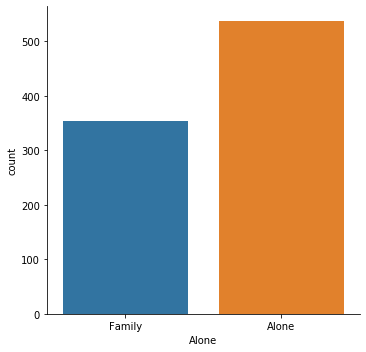

In [375]:
sns.catplot('Alone', data = titanic_df,  kind = 'count')

The graph shows 550 ppl travelled alone while rest were with family

# 5.) What factors helped someone survive the sinking?

In [376]:
#To answer this lets chck who survived
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonID,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


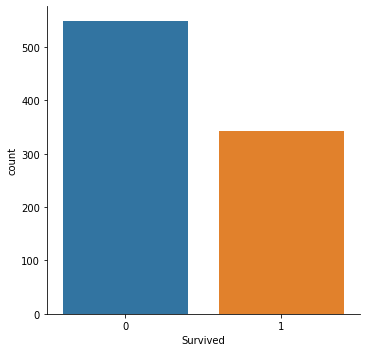

In [377]:
sns.catplot('Survived', data = titanic_df, kind = 'count')

The graph shows - approx 350 survived

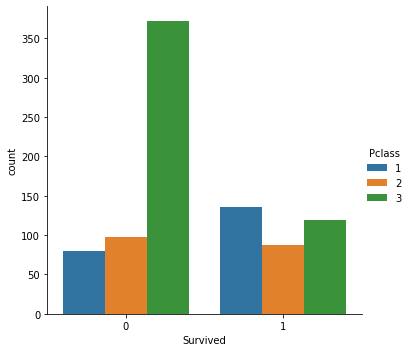

In [378]:
#Lets check the survival/death rate as per Class
sns.catplot('Survived', hue = 'Pclass',   data = titanic_df, kind="count")

Through graph seems ppl tavelling by Class 1 was given preference  over others or may be we could say Pclass 1 and Pclass 3 were able to leave ship faster - maybe because class 3 has more male and also we might have more children in class1.lets analyse that

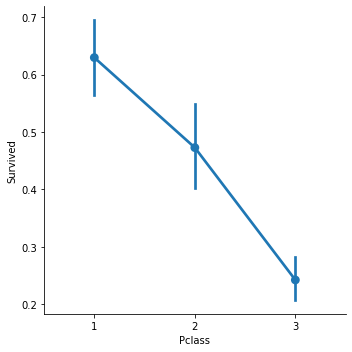

In [379]:
#Same can be viewed in point graph as well
sns.catplot('Pclass', 'Survived',   data = titanic_df, kind="point")

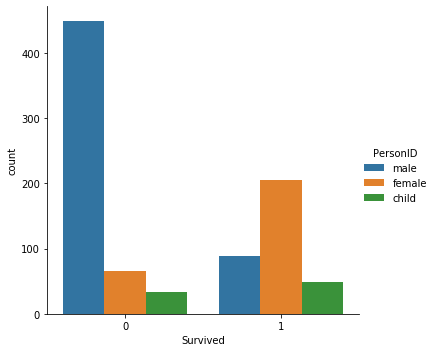

In [380]:
#Lets check the survival/death rate as per PersonID
sns.catplot('Survived', hue = 'PersonID',   data = titanic_df, kind="count")

Seeing survival rate,  seems females and children were given preference over males - Lets check if old age ppl were given preference aswell?

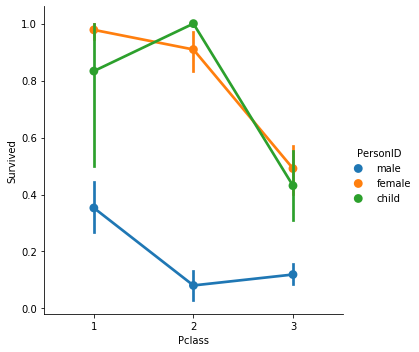

In [381]:
#Same could be viewed by point graph
sns.catplot('Pclass','Survived', hue ='PersonID', data = titanic_df, kind="point")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3c3b17d0>,
      dtype=object)

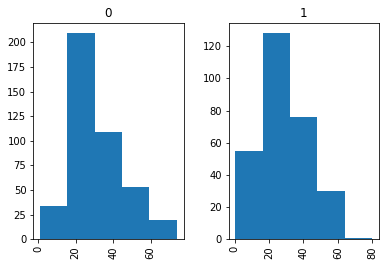

In [382]:
#titanic_df1.hist(column="Age", bins=5)  
titanic_df.hist("Age","Survived", bins=5) 

We dont see any increase in survival as per age

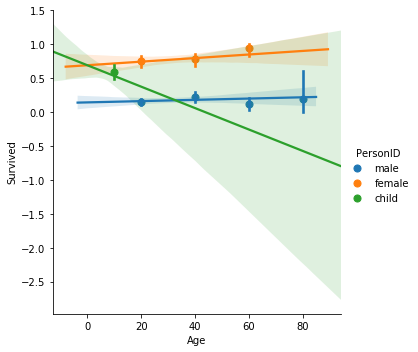

In [383]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue='PersonID',data=titanic_df, x_bins=generations)

We see here some deviation for old age in this plot.Lets check wrt class

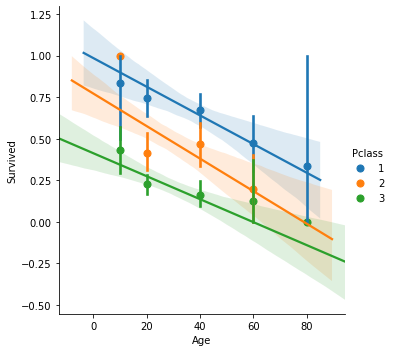

In [384]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df, x_bins=generations)

For Old age we see same deviation wrt Pclass as well

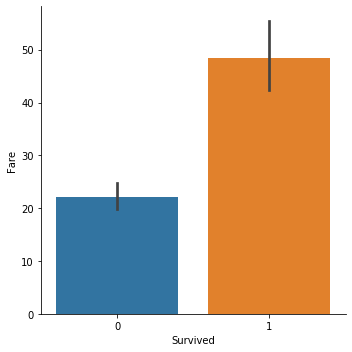

In [385]:
sns.catplot(y='Fare', x = 'Survived',   data = titanic_df, kind="bar")

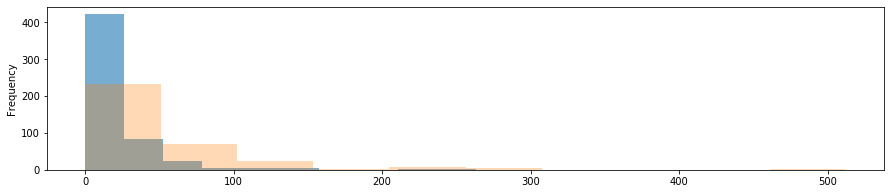

In [386]:
titanic_df["Fare"][titanic_df["Survived"] == 0].plot(kind='hist', alpha=0.6, figsize=(15,3),bins=10)
titanic_df["Fare"][titanic_df["Survived"] == 1].plot(kind='hist', alpha=0.3, figsize=(15,3),bins=10)

Ans - From Analysis - 1) Class 1 has maximum chances of survival than Pclass 2 and 3. 
2) survival of females and children was more as it seems of following rules of - "Ladies and kids first"
3) Cheaper Fare less survival
 

# 6.) Did the deck have an effect on the passengers survival rate? 

In [326]:
deck

PassengerId
2              C85
4             C123
7              E46
11              G6
12            C103
          ...     
872            D35
873    B51 B53 B55
880            C50
888            B42
890           C148
Name: Cabin, Length: 204, dtype: object

In [387]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonID,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [389]:
titanic_df['Cabin'].values

array([nan, 'C85', nan, 'C123', nan, nan, 'E46', nan, nan, nan, 'G6',
       'C103', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'D56', nan,
       'A6', nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'B78', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'D33', nan, 'B30', 'C52', nan, nan, nan,
       nan, nan, 'B28', 'C83', nan, nan, nan, 'F33', nan, nan, nan, nan,
       nan, nan, nan, nan, 'F G73', nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, 'C23 C25 C27', nan, nan, nan, 'E31', nan,
       nan, nan, 'A5', 'D10 D12', nan, nan, nan, nan, 'D26', nan, nan,
       nan, nan, nan, nan, nan, 'C110', nan, nan, nan, nan, nan, nan, nan,
       'B58 B60', nan, nan, nan, nan, 'E101', 'D26', nan, nan, nan,
       'F E69', nan, nan, nan, nan, nan, nan, nan, 'D47', 'C123', nan,
       'B86', nan, nan, nan, nan, nan, nan, nan, nan, 'F2', nan, nan,
       'C2', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [392]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

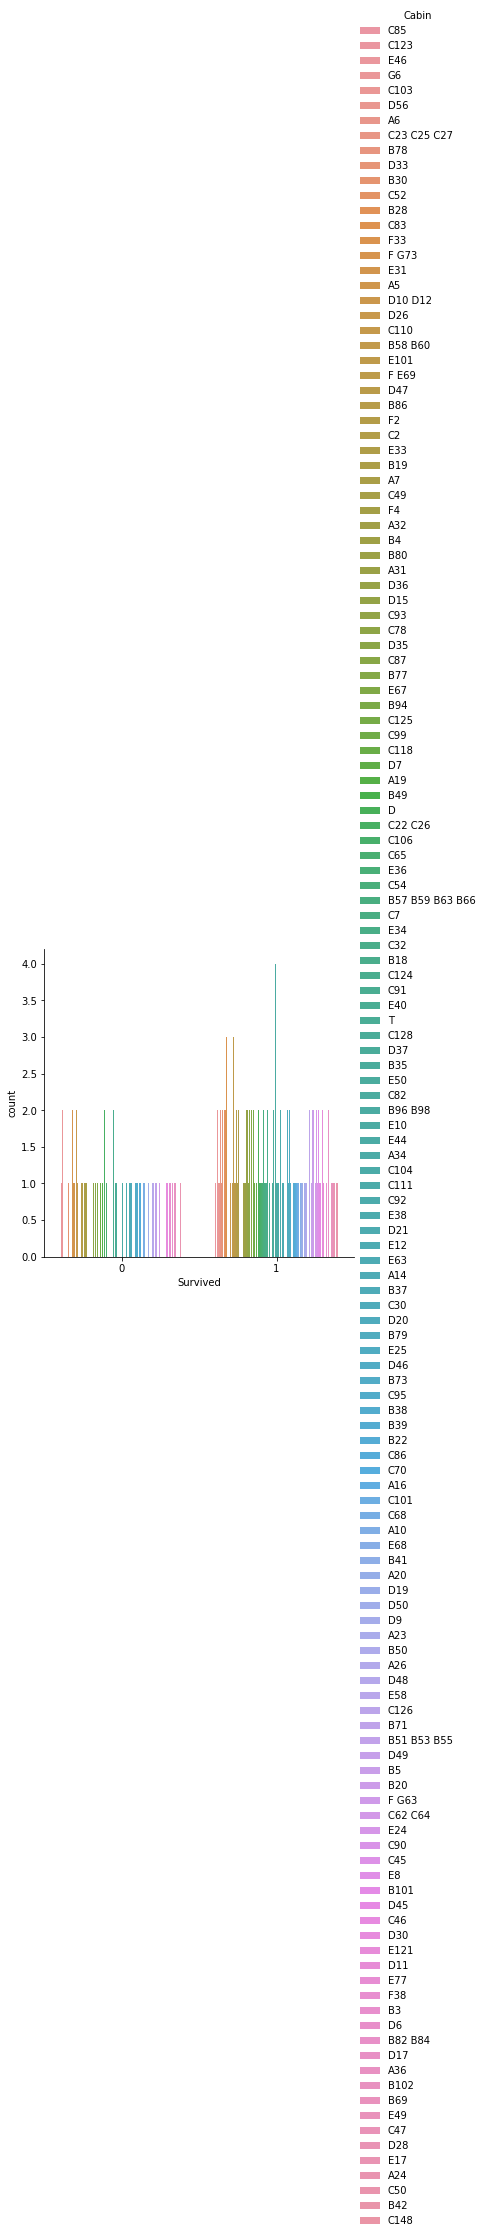

In [398]:
sns.catplot('Survived',hue = 'Cabin', data = titanic_df ,kind= 'count')

In [399]:
#Deck levels should be by 1st letter of Cabin.Let's extract the 1st letter of Cabin, then apply by making new column
# Deck and then combining with main dataframe

In [412]:
titanic_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [406]:
#Function to Extract 1st letter
def getDeckLetter(cabin):
    if type(cabin) == float:
        return np.nan
    else:
        return cabin[0];

In [407]:
titanic_df['Deck']= titanic_df['Cabin'].apply(getDeckLetter)

In [413]:
titanic_df.Deck.unique

<bound method Series.unique of 0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Deck, Length: 891, dtype: object>

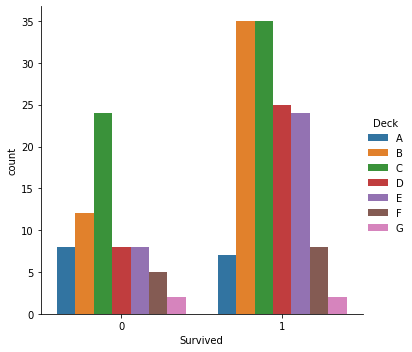

In [415]:
sns.catplot('Survived',hue = 'Deck', data = titanic_df ,hue_order=['A','B','C','D','E','F','G'],kind= 'count')

Ans - Chance of survival of Deck B and Deck C seems more than the rest.

In [421]:
#We also see there are none values in Cabin.
#Lets check survival against both
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
PersonID       891 non-null object
Alone          891 non-null object
Deck           204 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


In [436]:
#Let's see who has deck information - Info in Deck column with 1st letter other than T and  type(cabin) is marked Yes
def getDeckInfoPresent(cabin):
    if type(cabin) == float:
        return "No"
    elif cabin[0] == 'T':
         return "No"
    else:
        return "Yes";
    
#using apply
titanic_df['DeckInformation'] = titanic_df['Deck'].apply(getDeckInfoPresent)

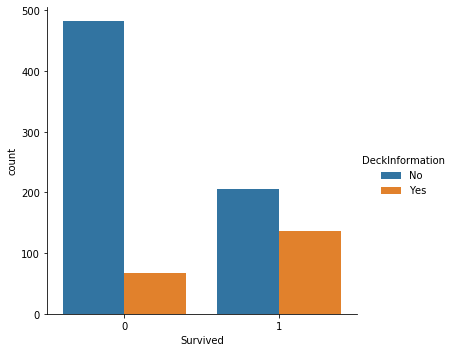

In [437]:
sns.catplot('Survived',hue='DeckInformation', data=titanic_df, kind="count")

Ans - We can see there were not info of mamy ppl on ship and in survived ppl - the result of having info and not having
info is quite comparable

# 7.) Did having a family member increase the odds of surviving the crash?

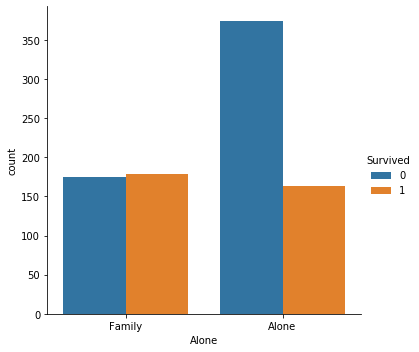

In [438]:
sns.catplot('Alone',hue='Survived',data=titanic_df,kind="count")

Ans - We do see survival of family more compare to ppl travelling alone